<a href="https://colab.research.google.com/github/rebsfeitosa/covid19/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil


O primeiro caso da pandemia pelo novo coronavírus, SARS-CoV2, foi identificado em Wuhan, na China, no dia 31 de dezembro do último ano. Desde então, os casos começaram a se espalhar rapidamente pelo mundo: primeiro pelo continente asiático, e depois por outros países.

Em fevereiro, a transmissão da Covid-19, nome dado à doença causada pelo SARS-CoV2, no Irã e na Itália chamaram a atenção pelo crescimento rápido de novos casos e mortes, fazendo com que o Ministério da Saúde alterasse a definição de caso suspeito para incluir pacientes que estiveram em outros países. No mesmo dia, o primeiro caso do Brasil foi identificado, em São Paulo.

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.


<img alt="Colaboratory logo" width="100%" src="https://cdn.academiademedicina.com.br/media/wysiwyg/ACMED/Gen-Medicina/Artigos/sonia-vieira-banners-blog-post-2020-04-09.png">

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Nesse projeto tentamos análisar os dados referente a pandemia disponibilizados nesse pelo site *Our Worl in Data* [link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv). São apresentadas tendências dentro dos países conforme eles tentam conter a propagação do vírus, seja com dados a respeito do acesso a higiene da população ou em relação a vacinação no países, se eles estão se aproximando ou já passaram do pico das taxas de infecção, ou se estão tendo uma nova onda de infecções ou mortes.

É importante ressaltar que cada país relata registros de maneira um pouco diferente e, inevitavelmente, deixam de registrar infecções e mortes não diagnosticadas.

### Dicionário de Variáveis

   * A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/rebsfeitosa/covid19/blob/main/col_dict.csv).

### Importando os dados do COVID-19



In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# alterando a coluna date para formato data
df['date'] = pd.to_datetime(df.date)

# definindo a coluna data como index
df = df.set_index('date')

## Análise Exploratória dos Dados

Para começar é importante verificar a quantidade de entradas e variáveis do dataset e entender o tipo de dado que cada coluna contém. Também iremos verificar o nome de todas as colunas do *dataset* e de qual tipo elas são.


In [2]:
# verificando a quantidade de linhas e colunas do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

#visualizar as primeiras entradas
df.head(3)

Dimensões do Dataset 
Variáveis:  61 
Entradas:  110270


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
# verificar os tipos de variáveis
df.dtypes

iso_code                       object
continent                      object
location                       object
total_cases                   float64
new_cases                     float64
                               ...   
handwashing_facilities        float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
excess_mortality              float64
Length: 61, dtype: object

Também é interessante verificar todos os nomes das variáveis do *Dataframe*.

In [4]:
# verificar o nome da colunas
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

## Porcentagem de valores nulos nas colunas

Um dos problemas mais comuns que podemos enfrentar na limpeza e exploração de dados é lidar com os valores ausentes. A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver 7 colunas do dataset tem mais 95% de suas células ocupadas por valores nulos.

In [5]:
# verificar a porcentagem de valor nulos de cada coluna
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20)

total_boosters_per_hundred               0.998232
total_boosters                           0.998232
weekly_icu_admissions                    0.990587
weekly_icu_admissions_per_million        0.990587
weekly_hosp_admissions                   0.981736
weekly_hosp_admissions_per_million       0.981736
excess_mortality                         0.964868
icu_patients                             0.892654
icu_patients_per_million                 0.892654
hosp_patients                            0.871080
hosp_patients_per_million                0.871080
people_fully_vaccinated_per_hundred      0.835232
people_fully_vaccinated                  0.835232
new_vaccinations                         0.833835
people_vaccinated                        0.808171
people_vaccinated_per_hundred            0.808171
total_vaccinations                       0.799710
total_vaccinations_per_hundred           0.799710
new_vaccinations_smoothed_per_million    0.645851
new_vaccinations_smoothed                0.645851


Ao deletar as colunas que tem mais de 85% de suas entradas nulas, deixamos o *dataset* mais limpo para trabalhar

In [ ]:
# deletando colunas com mais de 85% dos valores nulos

df.drop(['total_boosters', 'total_boosters_per_hundred', 'weekly_icu_admissions_per_million', 'weekly_icu_admissions',
         'weekly_hosp_admissions_per_million', 'weekly_hosp_admissions', 'excess_mortality', 'icu_patients_per_million',
         'icu_patients', 'hosp_patients_per_million', 'hosp_patients'], axis = 1, inplace=True)

# visualizando a nova quantidade de colunas e entradas

print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  50 
Entradas:  110059


# Verificando as localidades que têm mais casos de covid-19 no Mundo (dados de 14/08/2021)

Ocorreram pelo menos 65.763.218 infecções e 964.244 mortes registradas causadas pelo novo coronavírus em Ásia e Oriente Médio até agora.

De cada 100 infecções relatadas por último em todo o mundo, mais de 53 foram relatadas em países da Ásia e Oriente Médio. A região está registrando atualmente um milhão de novas infecções a cada 4 dias aproximadamente e relatou mais de 66.304.000 desde o início da pandemia.



In [16]:
# Quais países atualmente têm mais casos de covid-19 em 14/08/2021

(df.loc['2021-08-14', ['location', 
                       'total_cases']].sort_values(by="total_cases", 
                                                   ascending=False)).head(4)

,location,total_cases
date,,
2021-08-14,World,206807509.0
2021-08-14,Asia,65763218.0
2021-08-14,Europe,53548847.0
2021-08-14,North America,43915818.0


# Locais com maior quantidade de mortes decorrentes do COVID-19

A Ásia pode estar no topo em quantidade de casos confirmado, mas o continente com mais mortes é a Europa.
A região concentra seis países dos dez com mais mortes por Covid-19 do mundo, segundo o "Our World in Data": Reino Unido (130 mil), Itália (127 mil), Rússia (351 mil), França (112 mil), Alemanha (91 mil) e Espanha (82 mil).

As quatro nações com mais óbitos, no entanto, não são do continente e têm muito mais vítimas do vírus: Estados Unidos (620 mil), Brasil (569 mil), México (248 mil) e Índia (432 mil).

In [17]:
# Quais locais atualmente têm mais mortes de covid-19 (14/08/2021)

(df.loc['2021-08-14', ['location', 
                       'total_deaths']].sort_values(by="total_deaths", 
                                                    ascending=False)).head(4)

,location,total_deaths
date,,
2021-08-14,World,4354756.0
2021-08-14,Europe,1152383.0
2021-08-14,South America,1111236.0
2021-08-14,Asia,964244.0


Text(0, 0.5, 'Total de mortes')

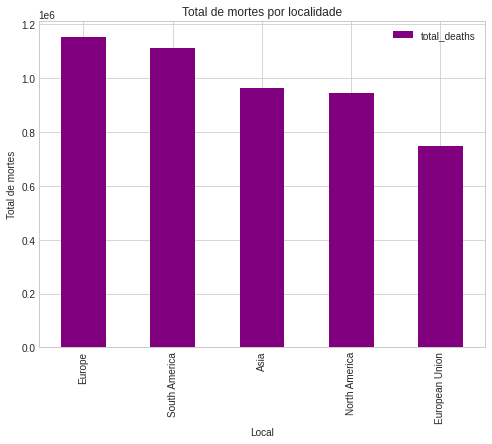

In [18]:
# visualizar o total de mortes por localidade
plt.style.use('seaborn-whitegrid')


df_last = df.loc['2021-08-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(8,6))

df_last.plot(x="location", y="total_deaths", kind="bar", color='purple', ax=ax)

ax.set_title("Total de mortes por localidade")
ax.set_xlabel("Local")
ax.set_ylabel("Total de mortes")

## Visualizar a correlação entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou gerar um *heatmap* usando a biblioteca *seaborn*

In [19]:
# Criar uma matriz de correlação

corr = df[['total_cases', 'total_deaths', 'stringency_index', 'extreme_poverty',
    'handwashing_facilities', 'population_density']].corr()

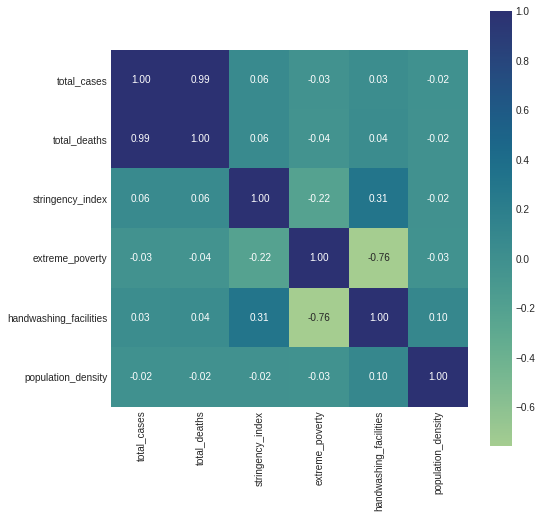

In [20]:
#  Plotar o heatmap a partir das correlações

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr, cmap='crest', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

# Análise Exploratória para o Brasil



### Criando um DataFrame com dados apenas do Brasil

A princípio, vamos separar os dados do Brasil do *DataFrame* original e analisar seu tamanho e primeiras entradas afim de ter uma noção básica desse novo *DataFrame*.

In [21]:
df_brasil = df.loc[df.location == "Brazil"].copy()

In [22]:
print('Dimensões do Dataset',
    '\nVariáveis: ',df_brasil.shape[1], "\n"
      'Entradas: ', df_brasil.shape[0])

df_brasil.head()

Dimensões do Dataset 
Variáveis:  61 
Entradas:  539


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


# Localizar a data do primeiro caso confirmado no Brasil e da primeira morte decorrente do vírus Sars-CoV-2

O primeiro caso de covid foi registrado em dezembro de 2019 e dois meses depois o Brasil já resgistrava também seu primeiro caso. Um pouco menos de um mês depois foi confirmada a primeira morte por COVID-19. Sabe-se que na época, por se tratar de uma doença não compreendida no mundo todo, não havia muitas medidas para controle e por isso, só foi registrada a primeira morte em março de 2020, mas não é uma confirmação que foi de fato a primeira morte no país, já que faltava testes de covid no país.

In [23]:
df_brasil[['new_cases', 'location']].sort_values('date', ascending=True).head(1)

,new_cases,location
date,,
2020-02-26,1.0,Brazil


In [24]:
df_brasil.loc[df_brasil['new_deaths'] > 0, ['new_deaths', 'location']].sort_values(by='date', ascending=True).head(1)

,new_deaths,location
date,,
2020-03-17,1.0,Brazil


## Descobrindo os dias que o Continente Sul Americano teve mais mortes

É possível verificar que os três dias que mais teve mortes decorrentes de COVID-19, na América Latina, foi do Brasil. Sendo o único país do continente que registrou mais de 4000 mil mortes pelo vírus no continente.

Abaixo, foram listados os 15 dias com mais mortes registrados por COVID-19 e é possível verificar o Brasil aparece 13 vezes.

In [25]:

df_SA = df.loc[df.continent == "South America"].copy() 

(df_SA[['new_deaths', 'location']].sort_values(by='new_deaths', ascending=False)).head(15)

,new_deaths,location
date,,
2021-04-08,4249.0,Brazil
2021-04-06,4195.0,Brazil
2021-03-31,3869.0,Brazil
2020-09-07,3852.0,Ecuador
2021-04-07,3829.0,Brazil
2021-04-13,3808.0,Brazil
2021-03-30,3780.0,Brazil
2021-04-01,3769.0,Brazil
2021-04-09,3693.0,Brazil


## Verificando a quantidade de novas mortes a cada 24 horas no país

Como foi apresentado acima, o Brasil teve seu pior momento em 08/04/2021 quando bateu 4249 mortes em 24 horas. No país, a maior decorrência de mortes é de complicações cardíacas, por volta de 1100 pessoas morrem por doenças cardiovasculares. Em 3 dias de pandemia as mortes decorrentes do vírus sars-cov-2 ultrapassaram a quantidade de mortes num período de 10 dias por doenças cardiovasculares.

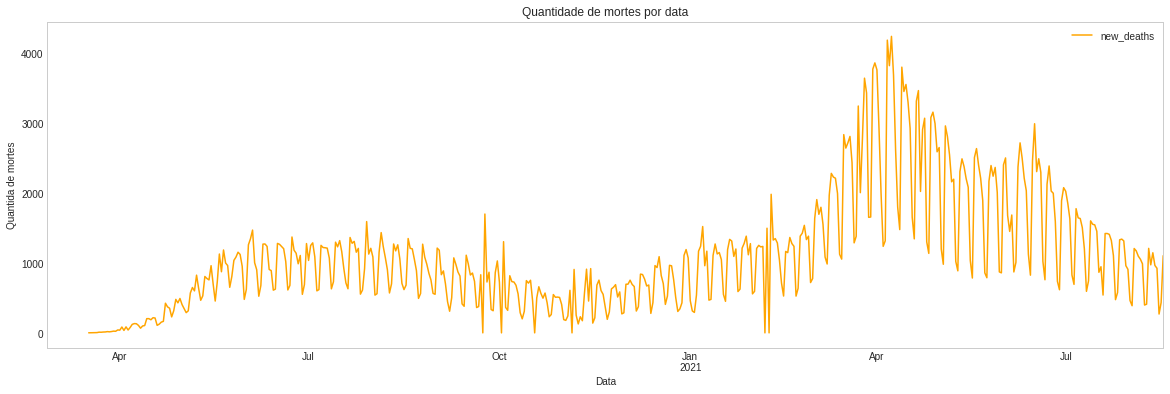

In [26]:
fig_1, ax_1 = plt.subplots(figsize=(20,6))

df_brasil.plot(y='new_deaths', color='orange', ax=ax_1)


ax_1.set_xlabel('Data')
ax_1.set_ylabel('Quantida de mortes')
ax_1.set_title('Quantidade de mortes por data')
ax_1.grid(False)

## Comparando dados do Brasil com resto da América do Sul

O Brasil é responsável por mais de 59% do números de mortes registradas em toda a América do Sul. A taxa foi atingida em 25 de maio de 2021, quando o Ministério da Saúde contabilizou 452.031 vítimas da pandemia....

Verificando no gráfico plotado abaixo, que traz em roxo o total de mortes no Brasil desde abril de 2020 e em laranja, nesse mesmo período, o total de morte dos outros países da América Latina.


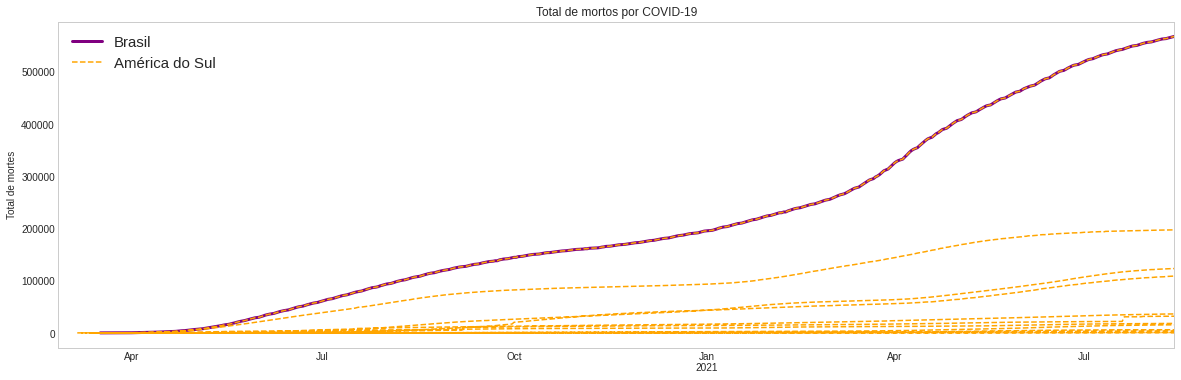

In [27]:

fig_2, (ax_2) = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

# plotar gráfico Brasil
df_brasil.loc['2020-02-26':'2021-08-13',["total_deaths"]].plot(kind="line", lw='3', color='purple',
                                                                ax=ax_2)
df_SA.loc['2020-02-26':'2021-08-13',["total_deaths"]].plot(kind="line", lw='1.5', linestyle='dashed', color='orange',
                                                                ax=ax_2)

plt.legend(["Brasil","América do Sul"], loc=0, prop={'size': 15})

ax_2.set_xlabel('')
ax_2.set_ylabel('Total de mortes')
ax_2.set_title('Total de mortos por COVID-19')
ax_2.grid(False)

## Conclusão

Foi feita apenas uma análise superficial na base de dados do *Our World in Data*, porém foi possível identificar várias informações a respeito do Brasil na pandemia e também no restante do Mundo.

O Brasil passou por um total de mais de 4000 mortes por dia, mas tem apresentado uma grande melhora. Atualmente, menos de 1500 brasileiros morrem por complicações decorrente do vírus Sars-CoV-2.

Foi mostrado por tabelas e gráficos que infelizmente o Brasil esteve entre os países com maior taxa de mortalidade por COVID-19 e que somente nosso país tem um total de mortes que representa mais da metade do total de mortes no continente. 